<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/03_Currency_%26_Oil_Forecast_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
df_oil_currency = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dissertation/df_oil_currency.csv")
df_oil_currency['Date'] = pd.to_datetime(df_oil_currency['Date']).dt.date

df_oil_currency.set_index('Date', inplace=True)
df_oil_currency.head(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
2019-01-09,58.22,-0.534464,1.145607,0.446000,1.147974,1.141044,1.139108,1.131811,56.09,56.42,...,1.141683,59.46,60.00,58.39,58.24,59.52,2019,1,9,2
2019-01-10,59.46,-0.478251,1.155495,0.616671,1.145607,1.147974,1.141044,1.139108,58.22,56.09,...,1.139809,60.00,58.39,58.24,59.52,59.63,2019,1,10,3
2019-01-11,60.00,-0.453771,1.151013,0.539312,1.155495,1.145607,1.147974,1.141044,59.46,58.22,...,1.139264,58.39,58.24,59.52,59.63,60.90,2019,1,11,4
2019-01-14,58.39,-0.526758,1.146014,0.453024,1.151013,1.155495,1.145607,1.147974,60.00,59.46,...,1.136557,58.24,59.52,59.63,60.90,61.49,2019,1,14,0
2019-01-15,58.24,-0.533558,1.147289,0.475036,1.146014,1.151013,1.155495,1.145607,58.39,60.00,...,1.136932,59.52,59.63,60.90,61.49,60.66,2019,1,15,1
2019-01-16,59.52,-0.475531,1.141683,0.378276,1.147289,1.146014,1.151013,1.155495,58.24,58.39,...,1.136402,59.63,60.90,61.49,60.66,60.52,2019,1,16,2
2019-01-17,59.63,-0.470544,1.139809,0.345931,1.141683,1.147289,1.146014,1.151013,59.52,58.24,...,1.138822,60.90,61.49,60.66,60.52,60.22,2019,1,17,3
2019-01-18,60.90,-0.412971,1.139264,0.336520,1.139809,1.141683,1.147289,1.146014,59.63,59.52,...,1.131350,61.49,60.66,60.52,60.22,60.90,2019,1,18,4


In [35]:
# Convert the Timestamp objects to datetime.date objects
train_end_date = pd.to_datetime('2022-12-31').date()
test_end_date = pd.to_datetime('2023-06-30').date()


In [36]:
train_data = df_oil_currency[df_oil_currency.index <= train_end_date].copy()
test_data = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)].copy()
test_data.tail(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3
2023-06-30,76.14,0.277908,1.086803,-0.568949,1.091584,1.095722,1.091048,1.090667,74.34,74.38,...,1.089064,76.12,76.18,76.61,77.56,78.43,2023,6,30,4


In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Function to Compare Plot

In [38]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


# Function to Create the Metrics for Model Evaluation




In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}


In [40]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.neural_network import MLPRegressor
import pandas as pd

def find_best_mlp_params(X_train, y_train):
    # Define the hyperparameters and their values
    param_grid = {
        'hidden_layer_sizes': [(10), (5,5)],
        'activation': ['tanh', 'relu', 'logistic', 'identity'],
        'solver': ['adam', 'lbfgs', 'sgd'],
        'alpha': [0.0001, 0.05, 0.1],
        'learning_rate': ['constant', 'adaptive', 'invscaling']
        #'learning_rate_init': [0.1, 0.01, 0.001, 0.0001],

    }

    # Create a MLPRegressor model
    mlp = MLPRegressor(
        random_state=42,
        max_iter=1000

    )

    # Create a TimeSeriesSplit object with more splits if possible
    tscv = TimeSeriesSplit(n_splits=2)

    # Create grid search using TimeSeriesSplit cross validation
    clf = GridSearchCV(mlp, param_grid, cv=tscv, scoring='r2', verbose=0)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Convert CV results to DataFrame and sort by test score
    results_df = pd.DataFrame(clf.cv_results_).sort_values(by='mean_test_score', ascending=False)

    return results_df[['mean_test_score', 'param_activation', 'param_alpha', 'param_hidden_layer_sizes', 'param_learning_rate', 'param_solver']]


In [41]:
from sklearn.neural_network import MLPRegressor

def train_mlp(X_train, y_train, params):
    model = MLPRegressor(
        hidden_layer_sizes=params['param_hidden_layer_sizes'],
        activation=params['param_activation'],
        solver=params['param_solver'],
        alpha=params['param_alpha'],
        learning_rate=params['param_learning_rate'],max_iter=2000,
        random_state=42)

    model.fit(X_train, y_train)

    score = model.score(X_train, y_train)

    print(f"Score for {params['param_activation']}:", score)

    return model


#Currency

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction

In [45]:
DateAttributes=['Day','Month']


In [46]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_USD_EUR_Price_t')
FeatureColumnsCurrency.extend(DateAttributes)

PredictedColumnCurrency='Actual_USD_EUR_Price_t+1'
FeatureColumnsCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4',
 'Day',
 'Month']

# Scaling the values to bring them on same Scale

In [47]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
Curscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsCurrency].values
X_train_Curscaled = Curscaler.fit_transform(X_train)

Curscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnCurrency].values
Y_train_Curscaled = Curscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param

In [48]:
import warnings
warnings.filterwarnings("ignore")


In [49]:
pd.set_option('display.max_colwidth', 1000)


In [50]:
# Assuming you have X_train and Y_train already defined
best_params_Cur = find_best_mlp_params(X_train_Curscaled, Y_train_Curscaled.ravel())
selected_columns = best_params_Cur.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_Cur = best_params_Cur.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_Cur.sort_values(by='mean_test_score', ascending=False)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
190,identity,0.05,"(5, 5)",constant,lbfgs,0.976665
82,relu,0.05,"(5, 5)",constant,lbfgs,0.968589
40,tanh,0.1,10,adaptive,lbfgs,0.956546
133,logistic,0.05,10,invscaling,lbfgs,0.893564


# Fitting the Model

In [51]:

for index, params in best_params_Cur.iterrows():
    model = train_mlp(X_train_Curscaled, Y_train_Curscaled.ravel(), params.to_dict())


Score for identity: 0.9905826764615987
Score for logistic: 0.9865480090363389
Score for relu: 0.9930500282491529
Score for tanh: 0.9923587452754046


In [52]:
Cur_params = best_params_Cur[best_params_Cur['param_activation'] == 'tanh']

Curmodel = train_mlp(X_train_Curscaled, Y_train_Curscaled.ravel(), Cur_params.iloc[0].to_dict())

Score for tanh: 0.9923587452754046


# Recursive multi-step forecasting using 1 Step Ahead model to Predct upto 5 Step Ahead for USD-EUR Exchange rate

In [53]:
FeatureColumnsCurrency=['Actual_USD_EUR_Price_t','Actual_USD_EUR_Price_t-1','Actual_USD_EUR_Price_t-2','Actual_USD_EUR_Price_t-3','Actual_USD_EUR_Price_t-4']

StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(FeatureColumnsCurrency)
  X_test = test_data[FeatureColumnsCurrency+DateAttributes].values
  X_test_scaled = Curscaler.transform(X_test)
  scaled_predictions = Curmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Curscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_USD_EUR_Price_t+'+str(i)] = predictions
  FeatureColumnsCurrency.pop(-1)
  FeatureColumnsCurrency.insert(0,'Predicted_USD_EUR_Price_t+'+str(i))



['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4']
['Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3']
['Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2']
['Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1']
['Predicted_USD_EUR_Price_t+4', 'Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t']


# MOdel Evaluation

In [54]:
Exchangeresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_USD_EUR_Price_t+{i}'
    predicted_col = f'Predicted_USD_EUR_Price_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_t+1,1,0.004478,0.000033,0.005730,0.414238
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_t+2,2,0.005831,0.000060,0.007716,0.539111
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_t+3,3,0.006936,0.000085,0.009244,0.640761
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_t+4,4,0.008083,0.000114,0.010657,0.746312
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_t+5,5,0.009601,0.000149,0.012195,0.886578


# 1 Step Ahead Predicction Plot Comparison

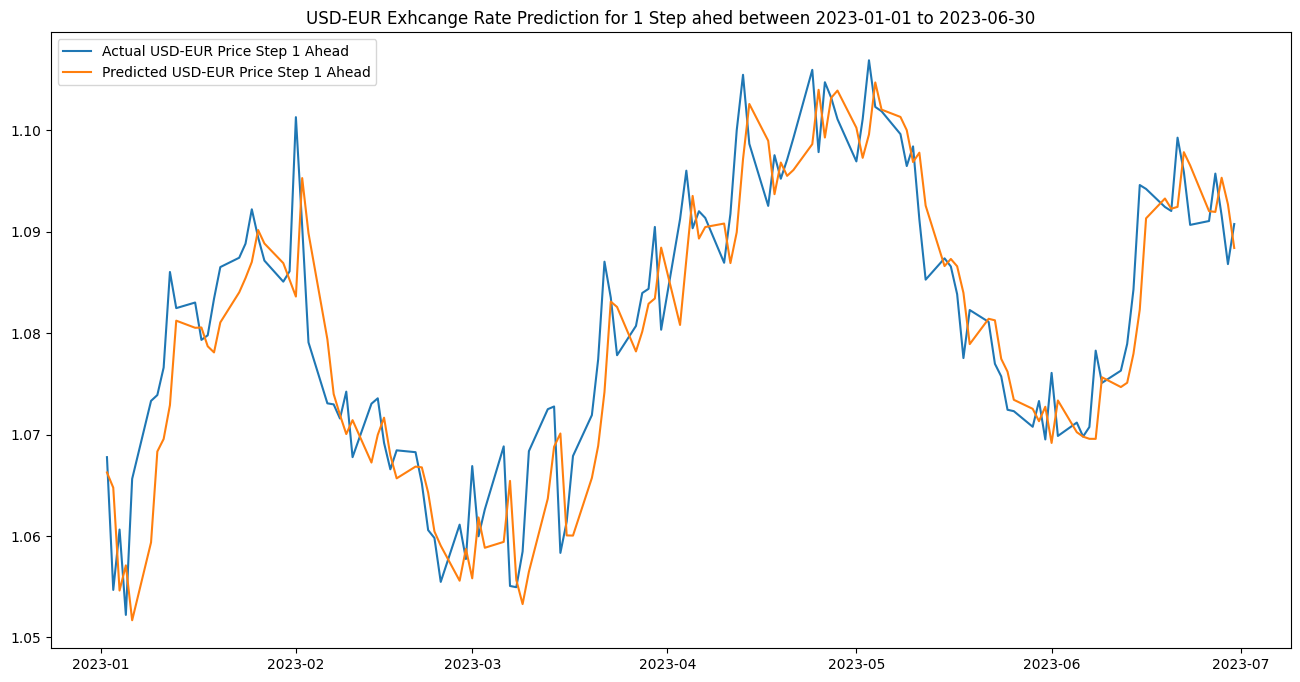

In [55]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],
              test_data['Predicted_USD_EUR_Price_t+1'],
              "Actual USD-EUR Price Step 1 Ahead",
              "Predicted USD-EUR Price Step 1 Ahead",
              "USD-EUR Exhcange Rate Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


# 5 Step Ahead Predicction Plot Comparison

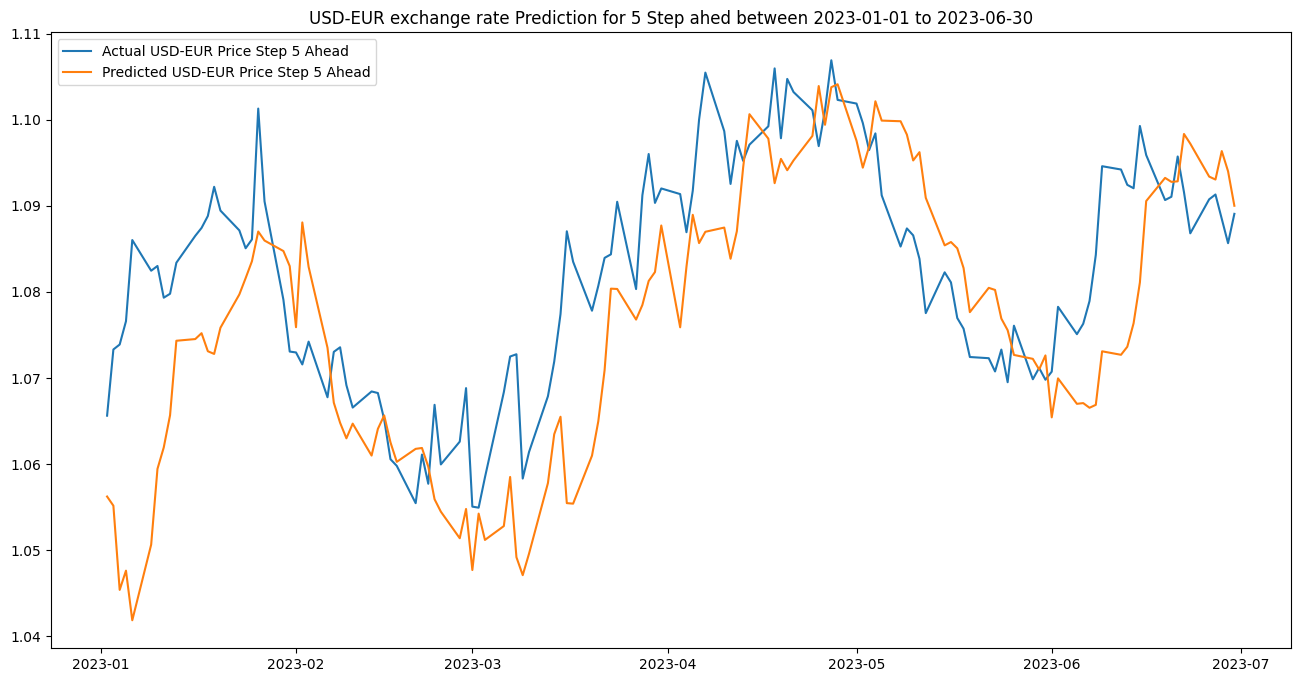

In [56]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],
              test_data['Predicted_USD_EUR_Price_t+5'],
              "Actual USD-EUR Price Step 5 Ahead",
              "Predicted USD-EUR Price Step 5 Ahead",
              "USD-EUR exchange rate Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


#Oil

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction


In [60]:
DateAttributes=['Day','Month']


In [61]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') ]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
FeatureColumnsOil.extend(DateAttributes)

PredictedColumnOil='Actual_Oil_Price_t+1'
FeatureColumnsOil

['Actual_Oil_Price_t',
 'Actual_Oil_Price_t-1',
 'Actual_Oil_Price_t-2',
 'Actual_Oil_Price_t-3',
 'Actual_Oil_Price_t-4',
 'Day',
 'Month']

# Scaling the values to bring them on same Scale


In [62]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize the scalers
Oilscaler = MinMaxScaler(feature_range=(0,1))
Oilscaler_y = MinMaxScaler(feature_range=(0,1))

# Extract and scale the input features
X_train_oil = train_data[FeatureColumnsOil].values
X_train_oil_scaled = Oilscaler.fit_transform(X_train_oil)

# Extract and scale the target variable, then reshape to 1D array for training
Y_train_oil = train_data[PredictedColumnOil].values
Y_train_oil_scaled = Oilscaler_y.fit_transform(Y_train_oil.reshape(-1,1)).ravel()


#Finding the Best Param


In [63]:


# Assuming you have X_train and Y_train already defined
best_params_Oil = find_best_mlp_params(X_train_oil_scaled,Y_train_oil_scaled)
selected_columns = best_params_Oil.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_Oil = best_params_Oil.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_Oil.sort_values(by='mean_test_score', ascending=False)


,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
94,relu,0.1,10,adaptive,lbfgs,0.979131
199,identity,0.1,10,constant,lbfgs,0.978853
43,tanh,0.1,10,invscaling,lbfgs,0.973392
127,logistic,0.05,10,constant,lbfgs,0.958962


In [64]:

for index, params in best_params_Oil.iterrows():
    model = train_mlp(X_train_oil_scaled,Y_train_oil_scaled, params.to_dict())


Score for identity: 0.9939102398442116
Score for logistic: 0.9899013892359402
Score for relu: 0.9941472617699403
Score for tanh: 0.9939577706388554


#Fitting the Model


In [65]:
relu_Oil_params = best_params_Oil[best_params_Oil['param_activation'] == 'relu']
print(relu_Oil_params.iloc[0].to_dict())
Oilmodel = train_mlp(X_train_oil_scaled,Y_train_oil_scaled, relu_Oil_params.iloc[0].to_dict())

{'param_activation': 'relu', 'param_alpha': 0.1, 'param_hidden_layer_sizes': 10, 'param_learning_rate': 'adaptive', 'param_solver': 'lbfgs', 'mean_test_score': 0.9791307885976659}
Score for relu: 0.9941472617699403


# Recursive multi-step forecasting using 1 Step Ahead model to Predict upto 5 Step Ahead for Oil Price


In [66]:
StepsAheadPrediction=5
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-') and col.endswith('')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
for i in range(1,StepsAheadPrediction+1):
  print(FeatureColumnsOil)
  X_test = test_data[FeatureColumnsOil+DateAttributes].values
  X_test_scaled = Oilscaler.transform(X_test)
  scaled_predictions = Oilmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Oilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_Oil_Price_t+'+str(i)] = predictions
  FeatureColumnsOil.pop(-1)
  FeatureColumnsOil.insert(0,'Predicted_Oil_Price_t+'+str(i))


['Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3', 'Actual_Oil_Price_t-4']
['Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3']
['Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2']
['Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1']
['Predicted_Oil_Price_t+4', 'Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t']


In [67]:
Oilresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_Oil_Price_t+{i}'
    predicted_col = f'Predicted_Oil_Price_t+{i}'
    Oilresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Oilmetrics = pd.DataFrame(Oilresults)
Oilmetrics


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.209208,2.758900,1.660994,1.538682
1,Actual_Oil_Price_t+2,Predicted_Oil_Price_t+2,2,1.846078,5.902174,2.429439,2.354588
2,Actual_Oil_Price_t+3,Predicted_Oil_Price_t+3,3,2.368875,8.702372,2.949978,3.019845
3,Actual_Oil_Price_t+4,Predicted_Oil_Price_t+4,4,2.880087,11.461117,3.385427,3.663735
4,Actual_Oil_Price_t+5,Predicted_Oil_Price_t+5,5,3.261196,15.343356,3.917060,4.139418


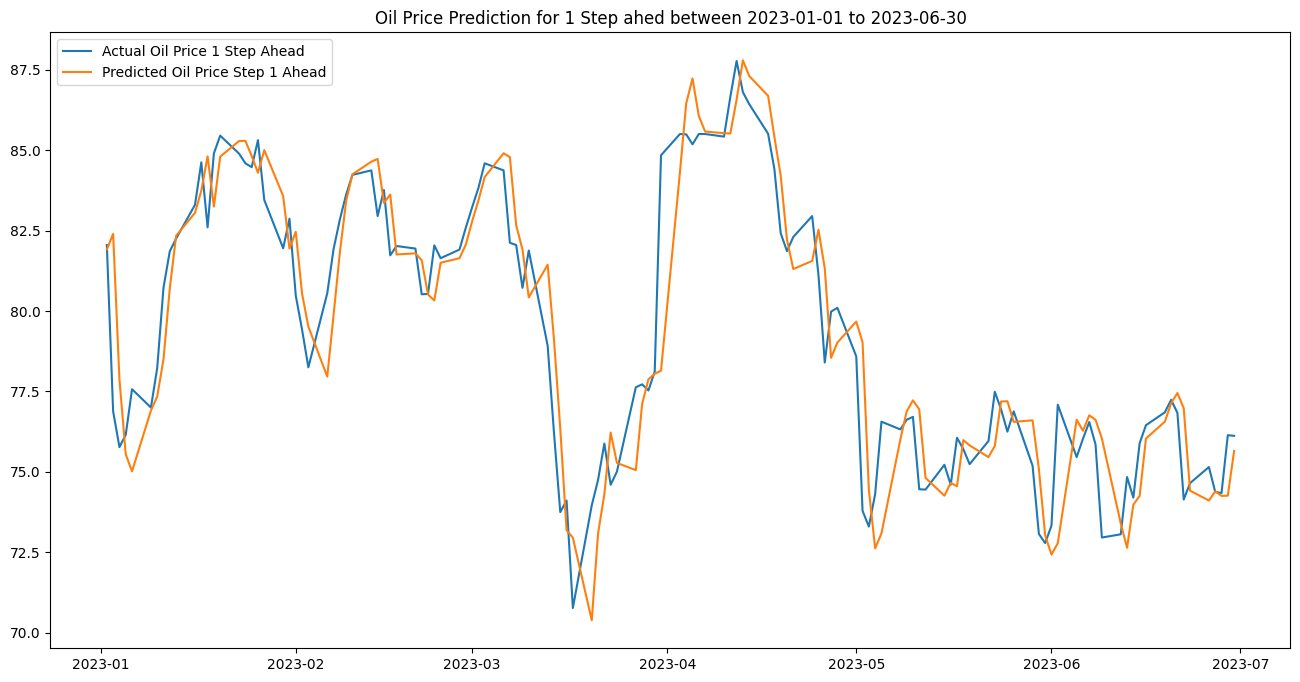

In [68]:
compare_plots(test_data['Actual_Oil_Price_t+1'],
              test_data['Predicted_Oil_Price_t+1'],
              "Actual Oil Price 1 Step Ahead",
              "Predicted Oil Price Step 1 Ahead",
              "Oil Price Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


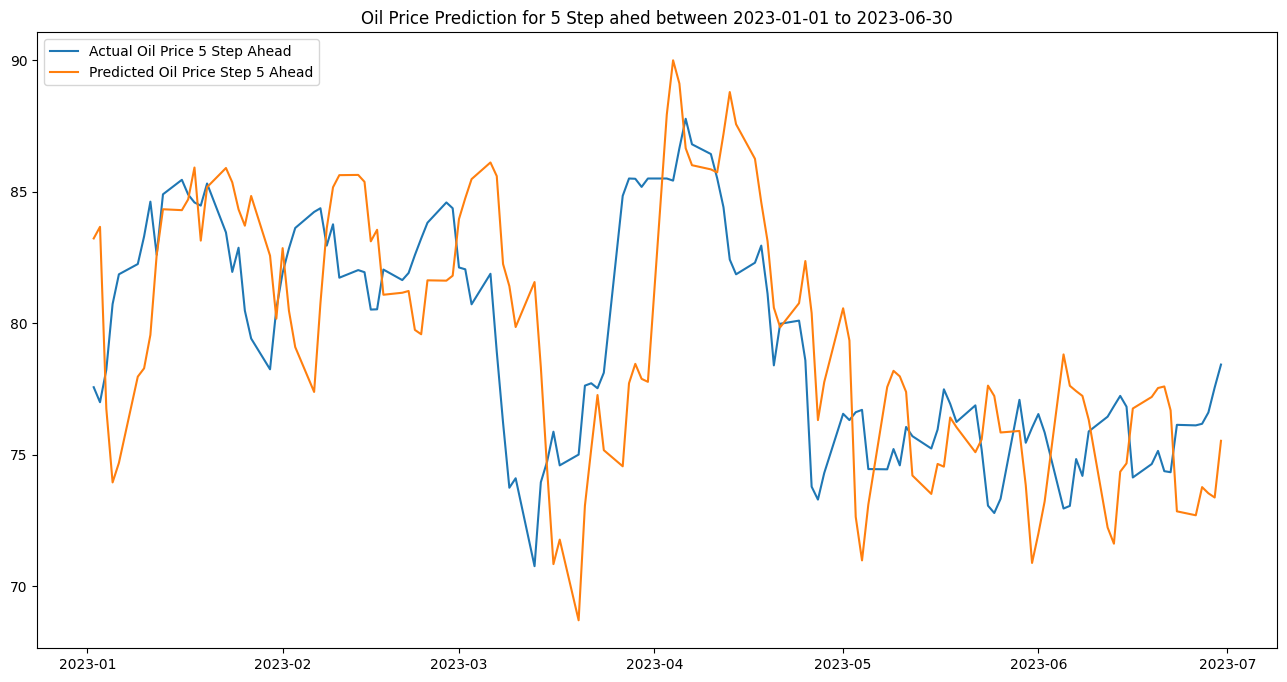

In [69]:
compare_plots(test_data['Actual_Oil_Price_t+5'],
              test_data['Predicted_Oil_Price_t+5'],
              "Actual Oil Price 5 Step Ahead",
              "Predicted Oil Price Step 5 Ahead",
              "Oil Price Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


#Currency + OIL

# Selecting the Feature Columns & Prediction Column which will be used for Prediction


In [70]:
DateAttributes=['Day','Month']


In [71]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_USD_EUR_Price_t')

FeatureColumnsOilCurrency.append('Actual_Oil_Price_t+1')
FeatureColumnsOilCurrency.extend(DateAttributes)

PredictedColumnOilCurrency='Actual_USD_EUR_Price_t+1'
FeatureColumnsOilCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4',
 'Actual_Oil_Price_t+1',
 'Day',
 'Month']

# Scaling the values to bring them on same Scale


In [72]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
CurOilscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsOilCurrency].values
X_train_scaled = CurOilscaler.fit_transform(X_train)

CurOilscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnOilCurrency].values
Y_train_scaled = CurOilscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param


In [73]:

best_params_CurOil = find_best_mlp_params(X_train_scaled, Y_train_scaled.ravel())

selected_columns = best_params_CurOil.groupby('param_activation')[['mean_test_score']].idxmax()
best_params_CurOil = best_params_CurOil.loc[selected_columns['mean_test_score'],
                         ['param_activation', 'param_alpha',
                          'param_hidden_layer_sizes',
                          'param_learning_rate', 'param_solver',
                          'mean_test_score']]
best_params_CurOil.sort_values(by='mean_test_score', ascending=False)


,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,mean_test_score
163,identity,0.0001,10,constant,lbfgs,0.954650
76,relu,0.05,10,adaptive,lbfgs,0.946841
25,tanh,0.05,10,invscaling,lbfgs,0.941595
112,logistic,0.0001,10,adaptive,lbfgs,0.895387


In [74]:
for index, params in best_params_CurOil.iterrows():
    model = train_mlp(X_train_scaled, Y_train_scaled.ravel(), params.to_dict())


Score for identity: 0.9926553421807551
Score for logistic: 0.9917370611439554
Score for relu: 0.9918837791779453
Score for tanh: 0.9926754781562893


#Fitting the Model

In [75]:
relu_CurOil_params = best_params_CurOil[best_params_CurOil['param_activation'] == 'relu']
print(relu_CurOil_params.iloc[0].to_dict())
CurOilmodel = train_mlp(X_train_scaled, Y_train_scaled.ravel(), relu_CurOil_params.iloc[0].to_dict())

{'param_activation': 'relu', 'param_alpha': 0.05, 'param_hidden_layer_sizes': 10, 'param_learning_rate': 'adaptive', 'param_solver': 'lbfgs', 'mean_test_score': 0.9468408110284341}
Score for relu: 0.9918837791779453


#Recursive multi-step forecasting using 1 Step Ahead model to Preict upto 5 Step Ahead for USD-EUR Exchange rate by using Oil Prices to validate its impact


In [76]:
FeatureColumnsOilCurrency=['Actual_USD_EUR_Price_t','Actual_USD_EUR_Price_t-1','Actual_USD_EUR_Price_t-2','Actual_USD_EUR_Price_t-3','Actual_USD_EUR_Price_t-4']
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  FeatureColumnsOilCurrency.append('Predicted_Oil_Price_t+'+ str(i))
  print(FeatureColumnsOilCurrency+DateAttributes)
  X_test = test_data[FeatureColumnsOilCurrency+DateAttributes].values
  X_test_scaled = CurOilscaler.transform(X_test)
  scaled_predictions = CurOilmodel.predict(X_test_scaled).reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = CurOilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_USD_EUR_Price_WithOil_t+'+str(i)] = predictions
  FeatureColumnsOilCurrency.remove('Predicted_Oil_Price_t+'+ str(i))
  FeatureColumnsOilCurrency.pop(-1)
  FeatureColumnsOilCurrency.insert(0,'Predicted_USD_EUR_Price_WithOil_t+'+str(i))


['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4', 'Predicted_Oil_Price_t+1', 'Day', 'Month']
['Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Predicted_Oil_Price_t+2', 'Day', 'Month']
['Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Predicted_Oil_Price_t+3', 'Day', 'Month']
['Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Predicted_Oil_Price_t+4', 'Day', 'Month']
['Predicted_USD_EUR_Price_WithOil_t+4', 'Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Predicted_Oil_Price_t+

In [77]:
Exchangeresults = []
StepsAheadPrediction = 5

for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_USD_EUR_Price_t+{i}'
    predicted_col = f'Predicted_USD_EUR_Price_WithOil_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_WithOil_t+1,1,0.004547,0.000034,0.005800,0.420509
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_WithOil_t+2,2,0.005488,0.000051,0.007148,0.507663
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_WithOil_t+3,3,0.006319,0.000062,0.007860,0.584685
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_WithOil_t+4,4,0.006924,0.000078,0.008811,0.640150
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_WithOil_t+5,5,0.007616,0.000095,0.009729,0.703455


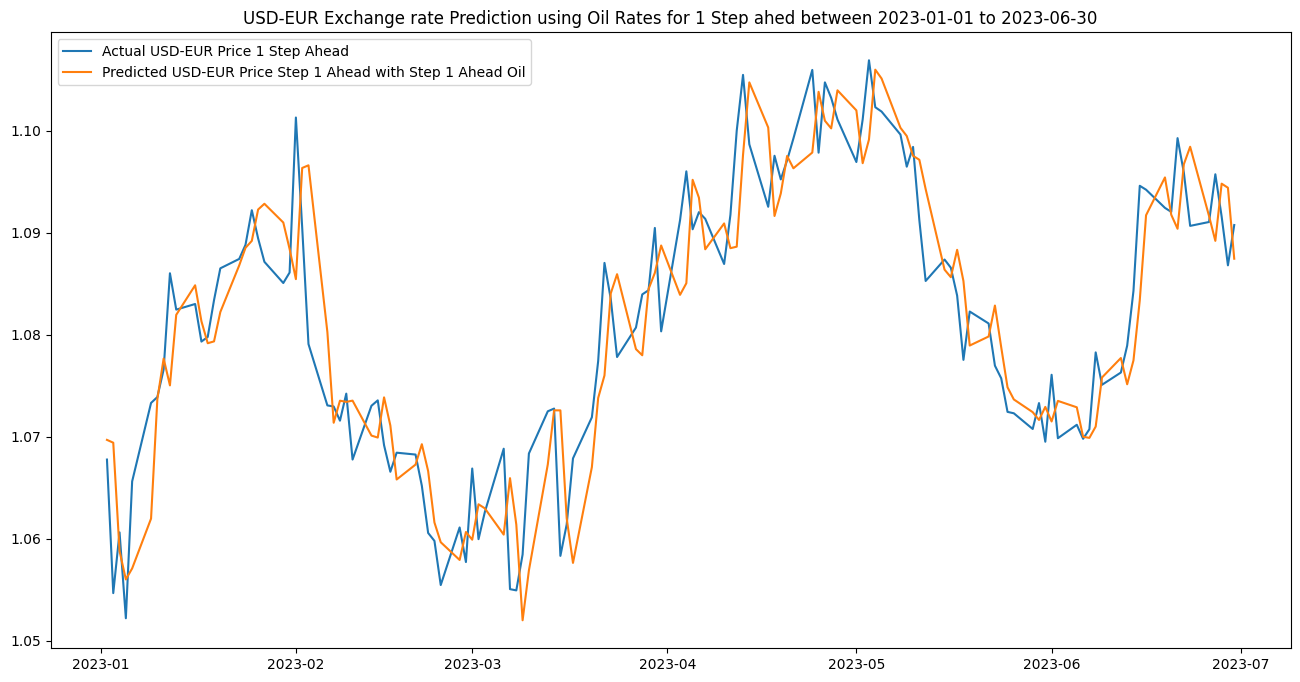

In [78]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],
              test_data['Predicted_USD_EUR_Price_WithOil_t+1'],
              "Actual USD-EUR Price 1 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 1 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 1 Step ahed between 2023-01-01 to 2023-06-30")


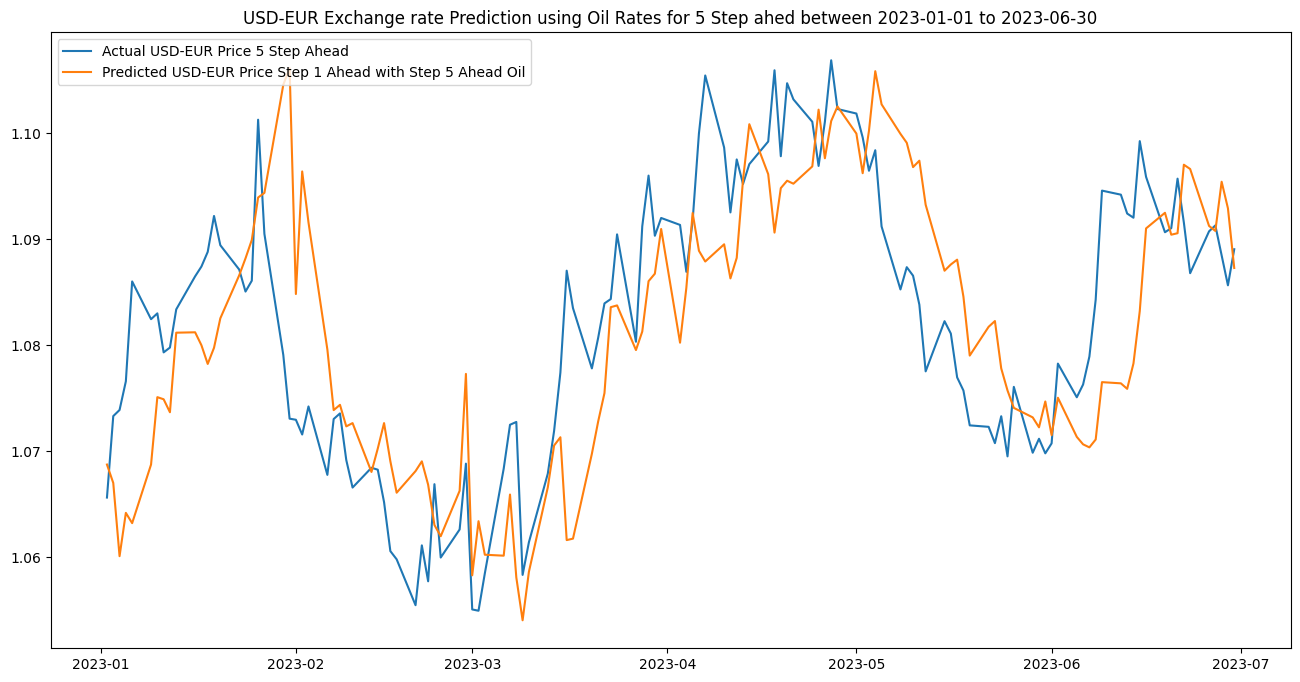

In [79]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],
              test_data['Predicted_USD_EUR_Price_WithOil_t+5'],
              "Actual USD-EUR Price 5 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 5 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 5 Step ahed between 2023-01-01 to 2023-06-30")
